In [18]:
import rasterio

In [19]:
image_path = 'data/batch_001/8928dec4ddbffff/DJI_0876.JPG'

In [20]:
# Open the image and read the bands as numpy arrays
with rasterio.open(image_path) as src:
    blue = src.read(1)
    green = src.read(2)
    red = src.read(3)

/Users/kevinlacaille/.pyenv/versions/3.11.4/envs/scipy2024-env/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [21]:
import numpy as np
# Allow division by zero
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [22]:
# Stack the bands to create a color image
rgb = np.dstack((blue, green, red))

In [23]:
vari = (green.astype(float) - red.astype(float)) / (
    green.astype(float) + red.astype(float) - blue.astype(float))

## Masking
### Thresholding

In [24]:
# Min and max values for the VARI index
vari_min = 0.1
vari_max = 0.5

# Generate the vegetation mask
vegetation_mask = np.full(vari.shape, np.nan)
vegetation_mask[(vari >= vari_min)] = 1

# Generate the non-vegetation mask
non_vegetation_mask = np.full(vari.shape, np.nan)
non_vegetation_mask[vari < vari_min] = 1

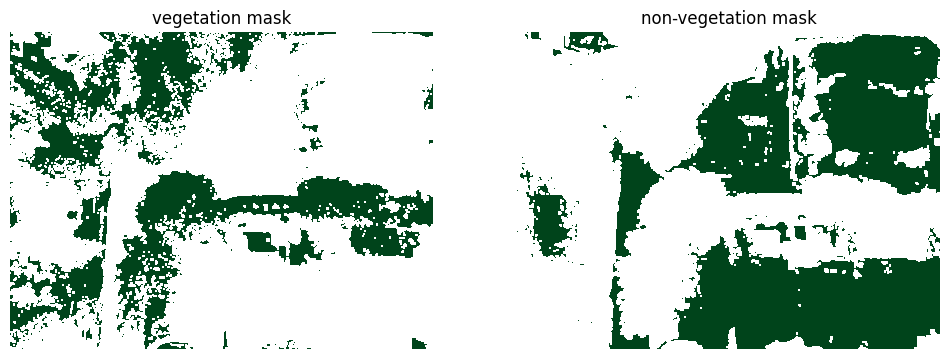

In [25]:
from matplotlib import pyplot as plt
# In the image below, colored areas are those identified as vegetation

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plt.sca(ax[0])
plt.imshow(vegetation_mask, cmap='Greens', vmax=1, vmin=0)
plt.axis('off')
plt.title('vegetation mask')

plt.sca(ax[1])
plt.imshow(non_vegetation_mask, cmap='Greens', vmax=1, vmin=0)
plt.axis('off')
plt.title('non-vegetation mask')

plt.show()


## Filtering

### Smoothing

In [26]:
import cv2 as cv

In [27]:
blur = cv.GaussianBlur(vegetation_mask, (7, 7), 0)

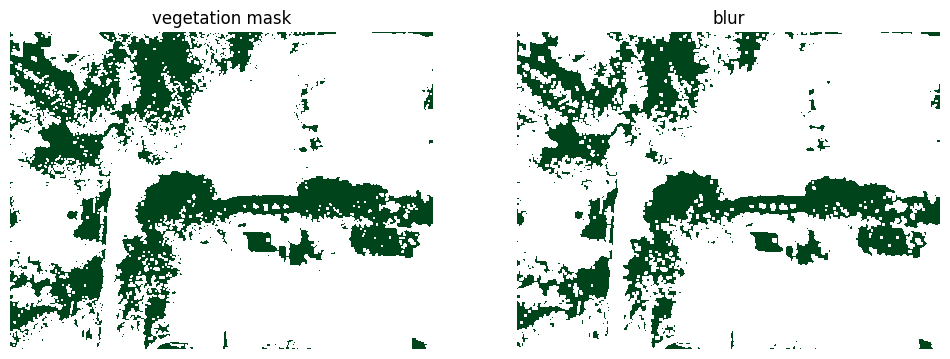

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plt.sca(ax[0])
plt.imshow(vegetation_mask, cmap='Greens', vmax=1, vmin=0)
plt.axis('off')
plt.title('vegetation mask')

plt.sca(ax[1])
plt.imshow(blur, cmap='Greens', vmax=1, vmin=0)
plt.axis('off')
plt.title('blur')

plt.show()

### Morphological filtering

In [29]:
opening_kernel = np.ones((30, 30), np.uint8)

opening = cv.morphologyEx(blur, cv.MORPH_OPEN, opening_kernel)


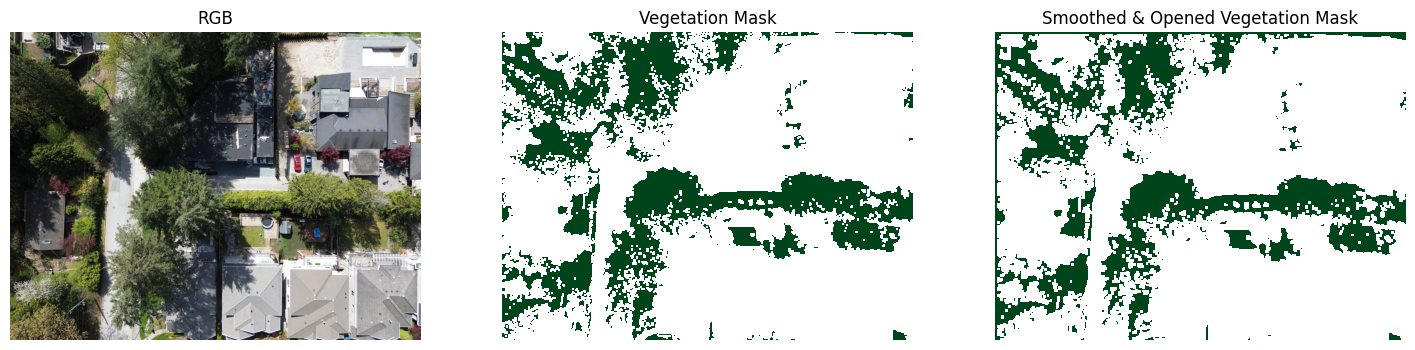

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

plt.sca(ax[0])
plt.imshow(rgb)
plt.axis('off')
plt.title('RGB')

plt.sca(ax[1])
plt.imshow(vegetation_mask, cmap='Greens', vmax=1, vmin=0)
plt.axis('off')
plt.title('Vegetation Mask')

plt.sca(ax[2])
plt.imshow(opening, cmap='Greens', vmax=1, vmin=0)
plt.axis('off')
plt.title('Smoothed & Opened Vegetation Mask')

plt.show()

In [31]:
closing_kernel = np.ones((30, 30), np.uint8)

closing = cv.morphologyEx(blur, cv.MORPH_CLOSE, closing_kernel)


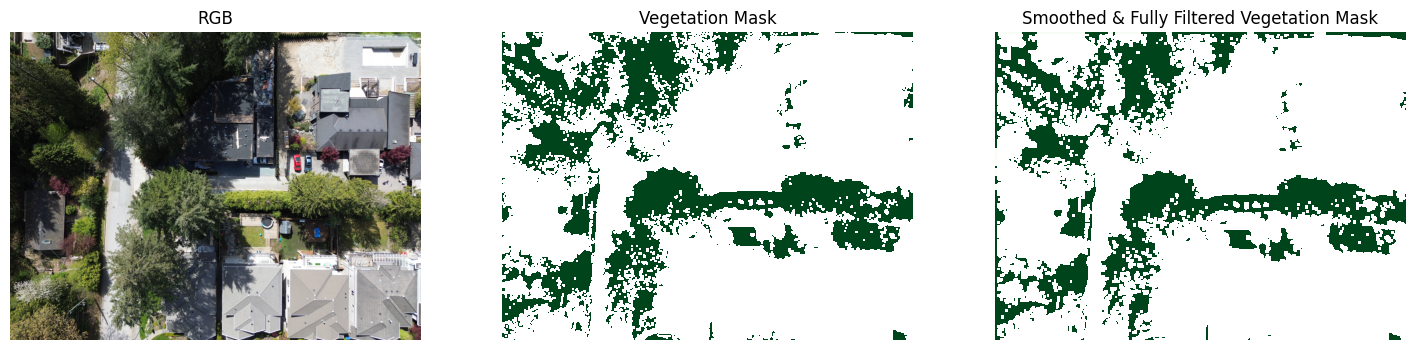

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

plt.sca(ax[0])
plt.imshow(rgb)
plt.axis('off')
plt.title('RGB')

plt.sca(ax[1])
plt.imshow(vegetation_mask, cmap='Greens', vmax=1, vmin=0)
plt.axis('off')
plt.title('Vegetation Mask')

plt.sca(ax[2])
plt.imshow(closing, cmap='Greens', vmax=1, vmin=0)
plt.axis('off')
plt.title('Smoothed & Fully Filtered Vegetation Mask')

plt.show()

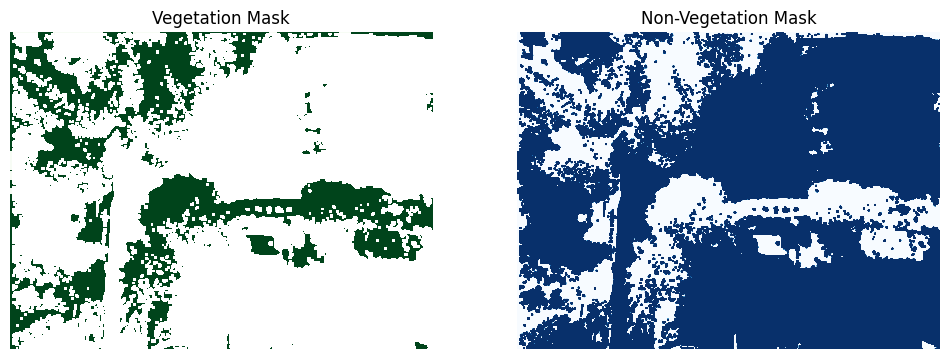

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plt.sca(ax[0])
plt.imshow(closing, cmap='Greens', vmax=1, vmin=0)
plt.axis('off')
plt.title('Vegetation Mask')

inverse_closing = np.logical_not(closing.astype(np.uint8)) * 255

plt.sca(ax[1])
plt.imshow(inverse_closing, cmap='Blues', vmax=1, vmin=0)
plt.axis('off')
plt.title('Non-Vegetation Mask')

plt.show()